In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("full-results.csv")

In [9]:
df.columns.values

array(['Identifier', 'Browser', 'Country', 'Time Started',
       'Last Answer Time', 'Duration', 'Ending Time',
       'How would you describe your organization’s maturity using serverless?',
       'Which public cloud providers do you currently use?', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19',
       'How long has your organization been running production applications in the cloud?',
       'What percentage of your production workloads utilize serverless (FaaS or Managed Services) in a public cloud environment?',
       'What percentage of your production workloads utilize serverless (FaaS or Managed Services) in an on-premises environment?',
       'How many serverless functions (FaaS) are you currently running in production?',
       'How many distinct managed services are you currently using in production environments?',
       'Before using

In [10]:
df["How would you describe your organization’s maturity using serverless?"].value_counts()

How would you describe your organization’s maturity using serverless?
High: We're all in on serverless                                232
Medium: We're transitioning to serverless                       127
Low: We're at the early stages experimenting with serverless     93
Don't know                                                        8
Name: count, dtype: int64

TypeError: can't multiply sequence by non-int of type 'float'

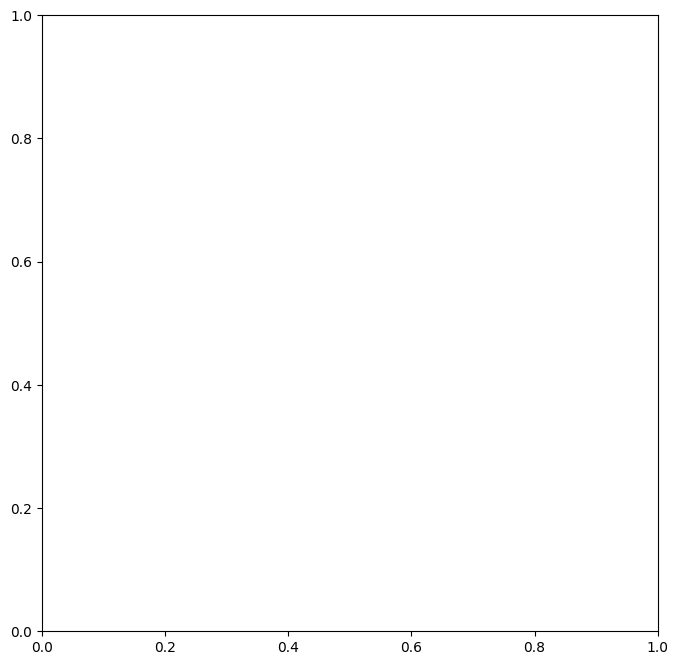

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

uses = df["How would you describe your organization’s maturity using serverless?"].value_counts()
uses_counts = uses.count()
plt.figure(figsize=(10,8))
colors = sns.color_palette('pastel')
plt.pie(uses.values, uses.index)
plt.tight_layout()
plt.show()

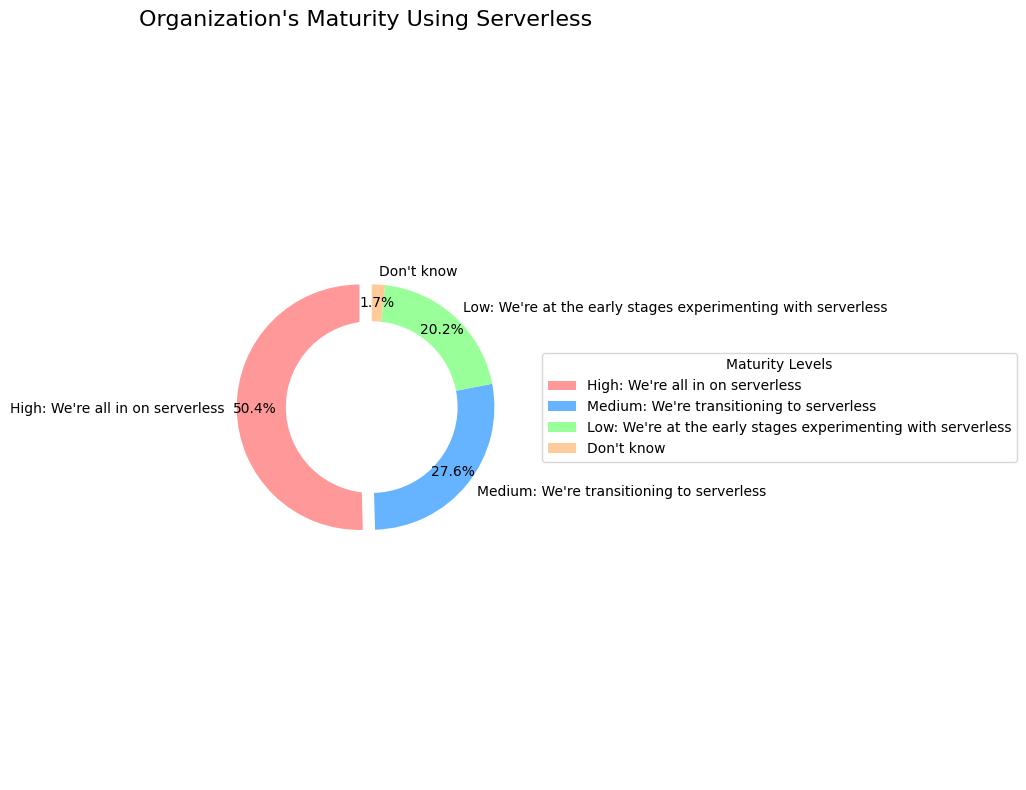

In [ ]:
# Data
labels = ['High: We\'re all in on serverless',
          'Medium: We\'re transitioning to serverless',
          'Low: We\'re at the early stages experimenting with serverless',
          'Don\'t know']
sizes = [232, 127, 93, 8]

# Colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Explode the largest slice slightly
explode = (0.1, 0, 0, 0)

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Add a circle at the center to create a donut chart effect (optional)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  

plt.title("Organization's Maturity Using Serverless", fontsize=16)

# Add a legend
plt.legend(labels, title="Maturity Levels", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

# Getting representative use cases

In [13]:
qn = 'Which of the following use cases do you use serverless for?'
i1 = df.columns.get_loc(qn)
next_qn = 'How many serverless “applications” are you running in production? '
i2 = df.columns.get_loc(next_qn)

results = df.iloc[:, i1:i2]

In [14]:
results

,Which of the following use cases do you use serverless for?,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185
0,REST APIs,GraphQL,ETL/Data/Batch Processing Tasks,DevOps/Operational tasks,Internet of Things (IoT),Business Logic,Continuous Integration (CI),Mobile Backends,Multimedia Processing,3rd-party Service Integration,Security Automation,Single Page Applications (SPAs),Chatbots,Edge computing,Stream Processing,Change Data Capture (CDC),Other (please specify),Other (please specify) Comment,None of these
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Internet of Things (IoT),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,ETL/Data/Batch Processing Tasks,NaN,NaN,Business Logic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,REST APIs,NaN,NaN,DevOps/Operational tasks,NaN,NaN,Continuous Integration (CI),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
579,REST APIs,GraphQL,ETL/Data/Batch Processing Tasks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Single Page Applications (SPAs),Chatbots,Edge computing,Stream Processing,Change Data Capture (CDC),NaN,NaN,NaN
580,NaN,NaN,NaN,NaN,Internet of Things (IoT),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edge computing,Stream Processing,NaN,NaN,NaN,NaN


In [15]:
# Change header to 2nd row
new_header = results.iloc[0]
results = results[1:]
results.columns = new_header

In [16]:
results

,REST APIs,GraphQL,ETL/Data/Batch Processing Tasks,DevOps/Operational tasks,Internet of Things (IoT),Business Logic,Continuous Integration (CI),Mobile Backends,Multimedia Processing,3rd-party Service Integration,Security Automation,Single Page Applications (SPAs),Chatbots,Edge computing,Stream Processing,Change Data Capture (CDC),Other (please specify),Other (please specify) Comment,None of these
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Internet of Things (IoT),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,ETL/Data/Batch Processing Tasks,NaN,NaN,Business Logic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,REST APIs,GraphQL,NaN,DevOps/Operational tasks,NaN,Business Logic,NaN,NaN,Multimedia Processing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,REST APIs,NaN,NaN,DevOps/Operational tasks,NaN,NaN,Continuous Integration (CI),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
579,REST APIs,GraphQL,ETL/Data/Batch Processing Tasks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Single Page Applications (SPAs),Chatbots,Edge computing,Stream Processing,Change Data Capture (CDC),NaN,NaN,NaN
580,NaN,NaN,NaN,NaN,Internet of Things (IoT),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edge computing,Stream Processing,NaN,NaN,NaN,NaN


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
total = len(results)
total

581

In [19]:
results.count()

0
REST APIs                          270
GraphQL                            109
ETL/Data/Batch Processing Tasks    160
DevOps/Operational tasks           182
Internet of Things (IoT)            50
Business Logic                     192
Continuous Integration (CI)        131
Mobile Backends                     93
Multimedia Processing               38
3rd-party Service Integration      129
Security Automation                 50
Single Page Applications (SPAs)    191
Chatbots                            59
Edge computing                      58
Stream Processing                  121
Change Data Capture (CDC)           30
Other (please specify)               2
Other (please specify) Comment       1
None of these                        4
dtype: int64

In [20]:
# Get what the others are
others = results['Other (please specify)']
others = others[others.notnull()]
others # ok useless

36     Other (please specify)
235    Other (please specify)
Name: Other (please specify), dtype: object

In [21]:
others = results['Other (please specify) Comment']
others = others[others.notnull()]
others

235    Performance Benchmarking
Name: Other (please specify) Comment, dtype: object

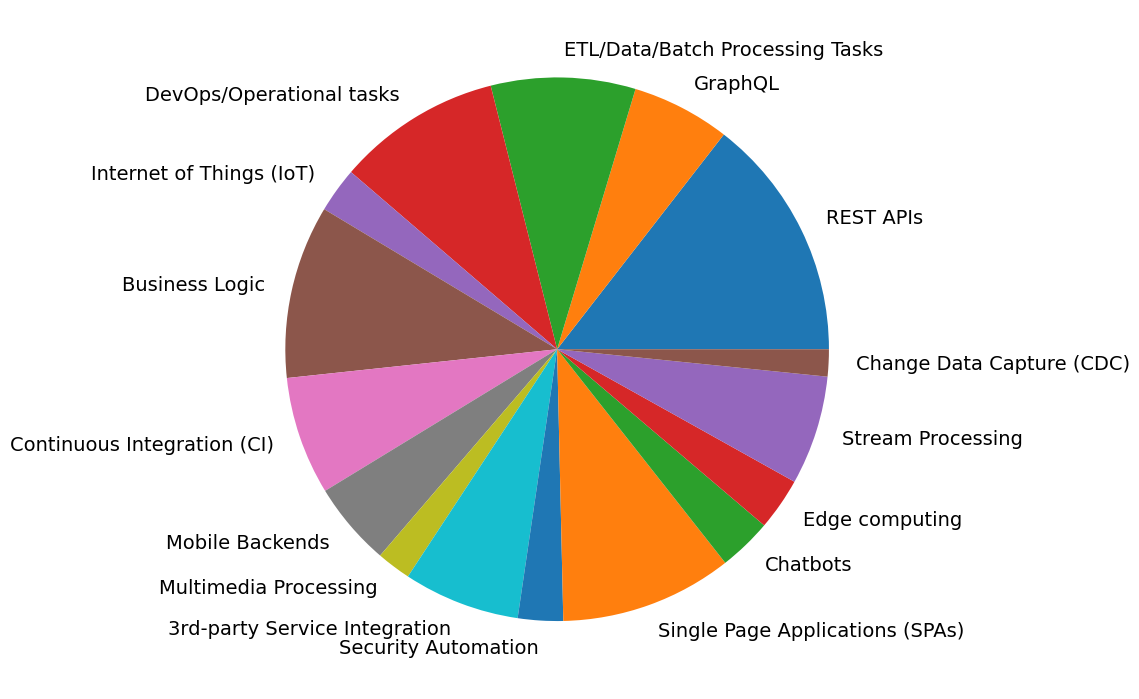

In [25]:
columns_to_exclude = ['Other (please specify)', 'Other (please specify) Comment', 'None of these']
r = results.drop(columns=columns_to_exclude)
counts = r.count()
plt.figure(figsize=(10,8))
colors = sns.color_palette('pastel')
plt.pie(counts, labels=r.columns.values, textprops={"fontsize": 14})
plt.tight_layout()
plt.show()

What I currently have
- REST APIs
    - rendering dynamic html (might count as an SPA????)
    - uploading files
- multimedia processing
    - thumbnailer
    - video processing
- utilities (technically just a REST api)
    - compression
- inference
    - image recognition
- data processing
    - graph suites

# Getting pain points

In [ ]:
qn = 'What are the top pain points when using serverless?'
i1 = df.columns.get_loc(qn)
next_qn = 'Please describe the other pain point that was not listed in the previous question.'
i2 = df.columns.get_loc(next_qn)
results = df.iloc[:, i1:i2]
results

,What are the top pain points when using serverless?,Unnamed: 307,Unnamed: 308,Unnamed: 309,Unnamed: 310,Unnamed: 311,Unnamed: 312,Unnamed: 313,Unnamed: 314,Unnamed: 315
0,Rank 1,Rank 2,Rank 3,Rank 4,Rank 5,Rank 6,Rank 7,Rank 8,Rank 9,Rank 10
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Deployments,Latency (Cold Starts),Debugging,Cost,"Platform Limitations (tmp folder size, duratio...",Monitoring,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
577,Deployments,Debugging,Monitoring,NaN,NaN,NaN,NaN,NaN,NaN,NaN
578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
579,Monitoring,Deployments,GPU Support,Debugging,"Platform Limitations (tmp folder size, duratio...",Latency (Cold Starts),Cost,Security,Vendor Lock-in,NaN
580,Vendor Lock-in,Deployments,Latency (Cold Starts),Debugging,Monitoring,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_header = results.iloc[0]
results = results[1:]
results.columns = new_header
results

,Rank 1,Rank 2,Rank 3,Rank 4,Rank 5,Rank 6,Rank 7,Rank 8,Rank 9,Rank 10
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Deployments,Latency (Cold Starts),Debugging,Cost,"Platform Limitations (tmp folder size, duratio...",Monitoring,NaN,NaN,NaN,NaN
5,Debugging,Deployments,"Platform Limitations (tmp folder size, duratio...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
577,Deployments,Debugging,Monitoring,NaN,NaN,NaN,NaN,NaN,NaN,NaN
578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
579,Monitoring,Deployments,GPU Support,Debugging,"Platform Limitations (tmp folder size, duratio...",Latency (Cold Starts),Cost,Security,Vendor Lock-in,NaN
580,Vendor Lock-in,Deployments,Latency (Cold Starts),Debugging,Monitoring,NaN,NaN,NaN,NaN,NaN


In [ ]:
results['Rank 1'].value_counts()

Rank 1
Debugging                                                 112
Monitoring                                                 64
Latency (Cold Starts)                                      61
Platform Limitations (tmp folder size, duration, etc.)     30
Deployments                                                25
Vendor Lock-in                                             19
Other / Not Listed                                         13
Cost                                                        7
Security                                                    6
GPU Support                                                 4
Name: count, dtype: int64